In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [43]:
data = pd.read_csv("sph6004_assignment1_data.csv")
data

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,36570066,3,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,NaN,236.0,318.0,15.0,6.0,5.0,4.0,0.0,157.0,110.0
1,39307659,0,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,82.0
2,38743306,2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,62.1
3,32339865,2,F,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,NaN,NaN,NaN,15.0,1.0,0.0,1.0,1.0,170.0,113.1
4,35526987,2,M,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,NaN,NaN,NaN,15.0,NaN,0.0,1.0,1.0,178.0,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,33431859,0,M,66.174854,WHITE,46.0,104.0,84.652174,99.0,162.0,...,NaN,NaN,NaN,13.0,6.0,3.0,4.0,0.0,NaN,107.7
50916,38881410,2,F,57.033913,WHITE,94.0,112.0,102.040000,89.0,108.0,...,NaN,NaN,NaN,15.0,6.0,0.0,2.0,1.0,NaN,44.2
50917,31061555,0,F,55.399450,WHITE,68.0,162.0,91.666667,83.0,132.0,...,NaN,NaN,NaN,3.0,1.0,1.0,1.0,0.0,NaN,80.0
50918,32355547,3,F,66.058622,PORTUGUESE,58.0,82.0,65.076923,92.0,152.0,...,NaN,276.0,276.0,14.0,6.0,5.0,3.0,0.0,NaN,95.1


In [44]:
targets = data['aki']

data.drop('aki', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data

,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,116.136364,40.0,...,NaN,236.0,318.0,15.0,6.0,5.0,4.0,0.0,157.0,110.0
1,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,109.833333,56.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,82.0
2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,112.153846,56.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,62.1
3,F,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,138.160000,60.0,...,NaN,NaN,NaN,15.0,1.0,0.0,1.0,1.0,170.0,113.1
4,M,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,97.672131,47.0,...,NaN,NaN,NaN,15.0,NaN,0.0,1.0,1.0,178.0,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,M,66.174854,WHITE,46.0,104.0,84.652174,99.0,162.0,130.038462,52.0,...,NaN,NaN,NaN,13.0,6.0,3.0,4.0,0.0,NaN,107.7
50916,F,57.033913,WHITE,94.0,112.0,102.040000,89.0,108.0,97.500000,54.0,...,NaN,NaN,NaN,15.0,6.0,0.0,2.0,1.0,NaN,44.2
50917,F,55.399450,WHITE,68.0,162.0,91.666667,83.0,132.0,113.000000,43.0,...,NaN,NaN,NaN,3.0,1.0,1.0,1.0,0.0,NaN,80.0
50918,F,66.058622,PORTUGUESE,58.0,82.0,65.076923,92.0,152.0,112.916667,48.0,...,NaN,276.0,276.0,14.0,6.0,5.0,3.0,0.0,NaN,95.1


In [45]:
rows_with_nan = data.isnull().any(axis=1).sum()

print(rows_with_nan)

50920


In [46]:
total_missing = data.isnull().sum().sum()

# Calculate the total number of elements in the DataFrame
total_elements = data.size

# Calculate the proportion of missing values
missing_proportion = total_missing / total_elements

print(missing_proportion)

0.4289948694029851


In [81]:
missing_values_count = data.isnull().sum()
columns_with_less_missing = missing_values_count <= 0.5*len(data)

# 使用布尔索引选取符合条件的列
filtered_data = data.loc[:, columns_with_less_missing]
filtered_data

,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,...,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit
0,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,116.136364,40.0,...,11.9,12.0,28.6,29.5,15.0,6.0,5.0,4.0,0.0,110.0
1,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,109.833333,56.0,...,20.0,24.7,28.4,150.0,15.0,6.0,5.0,4.0,0.0,82.0
2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,112.153846,56.0,...,12.1,12.1,26.0,26.0,15.0,6.0,5.0,4.0,0.0,62.1
3,F,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,138.160000,60.0,...,12.8,12.8,26.1,26.1,15.0,1.0,0.0,1.0,1.0,113.1
4,M,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,97.672131,47.0,...,10.4,11.9,27.7,39.4,15.0,NaN,0.0,1.0,1.0,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,M,66.174854,WHITE,46.0,104.0,84.652174,99.0,162.0,130.038462,52.0,...,12.3,12.3,29.8,29.8,13.0,6.0,3.0,4.0,0.0,107.7
50916,F,57.033913,WHITE,94.0,112.0,102.040000,89.0,108.0,97.500000,54.0,...,NaN,NaN,NaN,NaN,15.0,6.0,0.0,2.0,1.0,44.2
50917,F,55.399450,WHITE,68.0,162.0,91.666667,83.0,132.0,113.000000,43.0,...,9.6,10.0,26.0,26.1,3.0,1.0,1.0,1.0,0.0,80.0
50918,F,66.058622,PORTUGUESE,58.0,82.0,65.076923,92.0,152.0,112.916667,48.0,...,15.9,15.9,20.3,20.3,14.0,6.0,5.0,3.0,0.0,95.1


In [82]:
filtered_data_missing_values_count= filtered_data.isnull().sum()
print("After filtering, the number of missing values in the column with the most missing values is",filtered_data_missing_values_count.max())

After filtering, the number of missing values in the column with the most missing values is 23759


In [83]:
data_filled = filtered_data.fillna(filtered_data.mean(skipna=True))
are_there_still_missing_values = data_filled.isnull().any().any()

# 打印检查结果
print(are_there_still_missing_values)
data_filled

False


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,...,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit
0,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,116.136364,40.0,...,11.90000,12.000000,28.600000,29.500000,15.0,6.000000,5.0,4.0,0.0,110.0
1,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,109.833333,56.0,...,20.00000,24.700000,28.400000,150.000000,15.0,6.000000,5.0,4.0,0.0,82.0
2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,112.153846,56.0,...,12.10000,12.100000,26.000000,26.000000,15.0,6.000000,5.0,4.0,0.0,62.1
3,F,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,138.160000,60.0,...,12.80000,12.800000,26.100000,26.100000,15.0,1.000000,0.0,1.0,1.0,113.1
4,M,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,97.672131,47.0,...,10.40000,11.900000,27.700000,39.400000,15.0,5.167549,0.0,1.0,1.0,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,M,66.174854,WHITE,46.0,104.0,84.652174,99.0,162.0,130.038462,52.0,...,12.30000,12.300000,29.800000,29.800000,13.0,6.000000,3.0,4.0,0.0,107.7
50916,F,57.033913,WHITE,94.0,112.0,102.040000,89.0,108.0,97.500000,54.0,...,14.33761,16.586131,31.083967,42.127078,15.0,6.000000,0.0,2.0,1.0,44.2
50917,F,55.399450,WHITE,68.0,162.0,91.666667,83.0,132.0,113.000000,43.0,...,9.60000,10.000000,26.000000,26.100000,3.0,1.000000,1.0,1.0,0.0,80.0
50918,F,66.058622,PORTUGUESE,58.0,82.0,65.076923,92.0,152.0,112.916667,48.0,...,15.90000,15.900000,20.300000,20.300000,14.0,6.000000,5.0,3.0,0.0,95.1


In [84]:
cat_columns = [0,2]
float_columns = data_filled.select_dtypes(include=['float64'])  # 或使用 ['float'] 来包含所有浮点类型

# 获取浮点数类型列的列名（即索引）
float_column_names = float_columns.columns
float_column_indices = [data_filled.columns.get_loc(i) for i in float_column_names]
float_column_indices

[1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84]

In [85]:
len(float_column_indices)

83

In [86]:
from sklearn import pipeline
from sklearn import compose

In [87]:
from sklearn.model_selection import train_test_split

X=data_filled.values
y=targets.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, n_std=3):
        self.n_std = n_std
    
    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        self.means_ = X.mean()
        self.stds_ = X.std()
        return self
    
    def transform(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X_out = X.copy()
        for column in X_out.columns:
            mean = self.means_[column]
            std = self.stds_[column]
            upper = mean + self.n_std * std
            lower = mean - self.n_std * std
            X_out[column] = X_out[column].apply(lambda x: mean if x > upper or x < lower else x)
        return X_out


In [23]:
def is_outlier(s):
    lower_limit = s.mean() - 3 * s.std()
    upper_limit = s.mean() + 3 * s.std()
    return ~s.between(lower_limit, upper_limit)

X_train=pd.DataFrame(X_train[float_column_indices])
# Apply the function to each column and get a boolean DataFrame
outlier_mask = X_train.apply(is_outlier)

# Count the number of rows with outliers in any column
num_rows_with_outliers = (outlier_mask.any(axis=1)).sum()

print(f"Number of rows with outliers in any column:{num_rows_with_outliers}")

TypeError: Could not convert MMMMFMFMMFMMMMFFFFFMMFFFFMFMFFFFFMFFMMMMFFMFFMMFMMFFMFFFMFMFMFFFMMFFMMMMMMMMFMFMFFF to numeric

In [89]:
outlier_remover = OutlierRemover(n_std=3)
#preprocd_data=outlier_remover.fit(df_train[float_column_indices])

#X_train_transformed = outlier_remover.transform(df_train[float_column_indices])
#X_test_transformed = outlier_remover.transform(df_test[float_column_indices])

preprocessor = compose.ColumnTransformer(
                transformers=[
                    ('out', outlier_remover, float_column_indices)
                ], remainder="passthrough"
                )
train_transformed = preprocessor.fit(X_train)

In [90]:
X_train_transformed = preprocessor.transform(X_train)
X_train_transformed=pd.DataFrame(X_train_transformed)
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,64.788075,71.0,101.0,87.055556,136.0,173.0,156.875,73.0,117.0,90.0,...,31.083967,42.127078,15.0,6.0,5.0,4.0,0.0,76.4,M,WHITE
1,86.886887,45.0,69.0,53.233333,80.0,129.0,105.310345,33.0,83.0,49.068966,...,28.1,28.1,9.0,5.0,2.0,2.0,0.0,81.4,M,WHITE
2,81.633918,60.0,65.0,61.25,85.0,126.0,103.578947,44.0,67.0,53.631579,...,31.083967,42.127078,15.0,6.0,5.0,4.0,0.0,82.1,M,WHITE
3,66.376814,66.0,84.0,74.84,72.0,140.0,115.720588,33.0,81.5,61.882353,...,25.8,40.9,14.0,6.0,5.0,3.0,0.0,69.5,M,PATIENT DECLINED TO ANSWER
4,75.172602,58.0,80.0,71.357143,91.0,141.0,108.866667,42.0,63.0,49.966667,...,30.0,30.6,15.0,1.0,0.0,1.0,1.0,106.0,M,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40731,74.285929,57.0,88.0,72.72,95.0,126.0,111.708333,54.0,79.0,63.791667,...,26.8,44.1,14.0,6.0,5.0,3.0,0.0,70.4,M,WHITE
40732,37.479432,65.0,89.0,76.956522,122.0,154.0,139.954545,54.0,76.0,67.590909,...,23.5,23.5,15.0,6.0,0.0,3.0,1.0,114.7,F,BLACK/AFRICAN AMERICAN
40733,67.194429,66.0,69.0,67.75,105.0,136.0,125.666667,67.0,81.0,76.333333,...,52.7,52.7,15.0,1.0,0.0,1.0,1.0,39.0,F,ASIAN - ASIAN INDIAN
40734,58.156299,85.0,112.0,92.807692,93.0,128.0,109.36,65.0,85.0,74.72,...,29.1,30.1,15.0,5.0,0.0,3.0,1.0,47.0,M,UNABLE TO OBTAIN


In [91]:
X_test_transformed = preprocessor.transform(X_test)

In [92]:
scaler = preprocessing.StandardScaler()

In [93]:
oh_enc = preprocessing.OneHotEncoder( categories='auto', handle_unknown='ignore' )
#oh_enc.fit_transform( X_train.iloc[:, cat_columns] )
#oh_enc.categories_

In [94]:
float_columns = data_filled.select_dtypes(include=['float64'])

In [95]:
preprocessor = compose.ColumnTransformer(
                transformers=[
                    ('num', scaler, float_column_indices),              
                    ('cat', oh_enc, cat_columns)
                ], remainder="passthrough"
                )


In [96]:
preprocd_data = preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [97]:
X_train_preprcd = pd.DataFrame(X_train_transformed)
X_test_preprcd = pd.DataFrame(X_test_transformed)
y_train=pd.DataFrame(y_train,columns=['aki'])
y_test=pd.DataFrame(y_test,columns=['aki'])
#data_preprcd.index = X_train_transformed.index

In [98]:
df_train=pd.concat([X_train_preprcd, y_train], axis=1)
df_train
df_train.to_csv('train_preprocessed-nonPCA.csv')
df_test=pd.concat([X_test_preprcd, y_test], axis=1)
df_test
df_test.to_csv('test_preprocessed-nonPCA.csv')

In [99]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,aki
0,-0.010797,0.070639,-0.072355,0.177524,2.437674,1.093896,2.310531,2.182886,1.466747,2.310024,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1.270297,-1.646585,-1.635980,-1.975089,-0.753914,-0.847490,-0.843100,-1.220296,-0.270559,-1.308598,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.965776,-0.655879,-1.831434,-1.464869,-0.468950,-0.979857,-0.948990,-0.284421,-1.088114,-0.905228,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0.081304,-0.259597,-0.903031,-0.599934,-1.209855,-0.362143,-0.206422,-1.220296,-0.347204,-0.175795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.591206,-0.787973,-1.098484,-0.821600,-0.126995,-0.318021,-0.625600,-0.454580,-1.292503,-1.229234,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40731,0.539805,-0.854020,-0.707578,-0.734861,0.100976,-0.979857,-0.451807,0.566375,-0.474947,-0.006997,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
40732,-1.593911,-0.325644,-0.658715,-0.465228,1.639777,0.255570,1.275697,0.566375,-0.628239,0.328886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
40733,0.128702,-0.259597,-1.635980,-1.051177,0.670902,-0.538633,0.401868,1.672409,-0.372753,1.101784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
40734,-0.395249,0.995298,0.465141,0.543618,-0.013009,-0.891612,-0.595428,1.502250,-0.168364,0.959153,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [100]:
correlation_matrix = df_train.corr()
abs_target_correlation = correlation_matrix['aki'].abs()

print(abs_target_correlation.drop('aki', axis=0))


0      0.175609
1      0.056624
2      0.099243
3      0.082671
4      0.182186
         ...   
113    0.010930
114    0.013820
115    0.004113
116    0.002614
117    0.006195
Name: aki, Length: 118, dtype: float64


In [104]:
# 假设我们选择相关性绝对值最高的前N个特征
N = 20  # 例如，选择相关性绝对值最高的2个特征
top_features = abs_target_correlation.drop('aki', axis=0).nlargest(N).index.tolist()

X_train_selected = X_train_preprcd[top_features]
X_train_selected

,50,49,79,7,4,10,0,60,80,81,46,39,9,78,15,74,76,82,37,72
0,0.509097,0.650943,0.773449,2.182886,2.437674,2.450051,-0.010797,-0.758054,0.794611,-0.507899,1.428049,1.224251,2.310024,0.501995,-0.622951,-0.002337,-0.001741,-0.135031,0.769208,-0.002563
1,2.461193,2.977642,-0.671249,-1.220296,-0.753914,-0.808217,1.270297,0.342521,-1.023809,-0.507899,0.394255,-1.365993,-1.308598,-0.103586,0.183447,-0.278909,-0.508899,-0.003807,-1.191323,-0.222591
2,1.345709,1.300254,0.773449,-0.284421,-0.468950,-0.518593,0.965776,1.687667,0.794611,-0.507899,0.187497,-0.356237,-0.905228,0.501995,-0.466151,-0.002337,-0.001741,0.014564,-0.487926,-0.002563
3,-0.095123,-0.214805,0.773449,-1.220296,-1.209855,-0.699608,0.081304,0.220235,-0.114599,-0.507899,-0.846297,-0.268432,-0.175795,0.501995,0.024924,0.018893,-0.046107,-0.316120,-0.083847,-0.025822
4,0.044312,0.163960,-1.634382,-0.454580,-0.126995,-0.373781,0.591206,0.464807,-1.933019,1.978462,-0.846297,-0.531846,-1.229234,-2.525907,-0.260072,-0.338469,-0.418510,0.641815,-0.966834,-0.320976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40731,-0.420472,-0.431242,0.773449,0.566375,0.100976,0.784714,0.539805,-0.024338,-0.114599,-0.507899,-1.053056,1.092544,-0.006997,0.501995,-0.236552,0.008966,0.069591,-0.292500,1.143355,-0.025822
40732,-0.792300,-0.972335,-1.634382,0.566375,1.639777,0.857120,-1.593911,-0.635768,-0.114599,1.978462,2.668601,0.521812,0.328886,0.501995,-0.466151,-0.576711,-0.675215,0.870145,0.529754,-0.517746
40733,0.741489,1.083817,-1.634382,1.672409,0.670902,1.291556,0.128702,-0.758054,-1.933019,1.978462,-0.846297,-1.014773,1.101784,-2.525907,-0.667751,3.880392,0.380529,-1.116587,-0.727380,3.614422
40734,0.880925,-0.323024,-1.634382,1.502250,-0.013009,0.929526,-0.395249,-1.124912,-0.114599,1.978462,1.634807,0.302300,0.959153,-0.103586,0.495323,-0.378176,-0.436588,-0.906629,0.290300,-0.320976


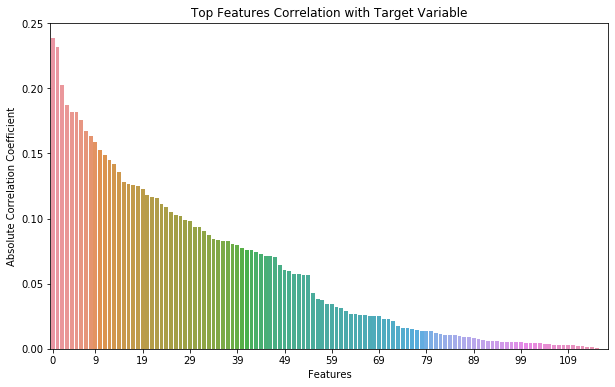

In [44]:
top_features_core=abs_target_correlation[top_features].reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_core.index, y=top_features_core.values)
plt.title('Top Features Correlation with Target Variable')
plt.ylabel('Absolute Correlation Coefficient')
plt.xlabel('Features')
ticks = [i for i in range(0, 119, 10)]
ticks[1:] = [x-1 for x in ticks[1:]]  # Adjust starting from the second element

# Assuming you have a plot, set x-axis ticks as specified
plt.xticks(ticks, labels=[str(tick) for tick in ticks])
plt.show()

In [105]:
X_test_selected = X_test_preprcd[top_features]
X_test_selected

,50,49,79,7,4,10,0,60,80,81,46,39,9,78,15,74,76,82,37,72
0,-0.699343,-0.593570,-1.152816,0.821613,-0.468950,0.567496,-0.345945,0.464807,-1.023809,-0.507899,-1.053056,2.936446,0.913918,-2.525907,-1.907215,-0.002337,-0.001741,-0.906629,3.223613,-0.002563
1,-0.513429,-0.377133,-1.634382,-0.709819,-0.070002,0.495090,-0.602392,-1.858629,-1.933019,1.978462,0.187497,1.619373,-0.240200,-1.314746,0.666646,-0.566784,-0.588441,-0.061546,1.008663,-0.517746
2,-0.652865,-0.539461,0.773449,0.268596,0.100976,-3.342425,-0.549519,-0.513482,0.794611,-0.507899,-0.226021,1.531568,0.587914,0.501995,-0.936550,-0.169715,-0.469128,-0.171774,1.218185,-0.222591
3,-0.002166,0.055741,0.291883,2.608284,0.784887,1.943209,-1.263567,2.299098,-0.114599,-0.507899,1.014531,1.092544,2.752063,0.501995,-1.231196,-0.477443,-0.610135,1.087977,1.397776,-0.419361
4,0.695011,0.921490,-1.634382,-0.199341,-0.696921,-3.052801,-0.008473,-0.635768,-0.114599,1.978462,-0.846297,-0.619651,-0.830908,0.501995,-0.134352,-0.002337,-0.001741,0.636566,-0.502892,-0.002563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10179,-0.652865,-0.701788,-1.152816,-0.369501,-0.582936,-0.373781,0.358207,0.220235,-0.114599,-0.507899,0.394255,0.082788,-0.483007,0.501995,-1.154371,-0.546930,-0.573979,-0.045799,-0.098813,-0.517746
10180,-0.652865,-0.593570,0.773449,-0.454580,-0.240980,-0.156563,0.637321,-1.002626,-0.114599,-0.507899,-0.639538,-1.453798,-0.902125,0.501995,-0.621406,-0.120081,-0.375123,-0.775405,-1.370913,-0.124206
10181,-0.606386,-0.485351,0.773449,-0.369501,-0.696921,-0.301375,-0.154807,0.342521,0.794611,-0.507899,-0.846297,0.082788,-0.302578,0.501995,-1.191446,-0.159788,-0.541439,1.114222,0.080778,-0.124206
10182,0.090791,0.055741,-1.152816,-0.794898,-0.297973,-0.446187,0.713007,0.831665,-1.933019,-0.507899,0.601014,0.785227,-0.267694,-2.525907,-1.387185,1.150541,-0.244963,0.248143,0.484857,1.253183


In [106]:
df_train=pd.concat([X_train_selected, y_train], axis=1)
df_train
df_train.to_csv('train_preprocessed-correlation20.csv')
df_test=pd.concat([X_test_selected, y_test], axis=1)
df_test
df_test.to_csv('test_preprocessed-correlation20.csv')